In [13]:
rm(list = ls())
library(randomForest)
library(rpart)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [14]:
# set you paths
setwd("D:/Working/03.Korea/연구조사론/MiddleTest")
data      <- read.table("class.txt", header = T)
data.test <- read.table("class_test.txt", header = T)


Call:
glm(formula = y ~ ., family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3348  -0.4936   0.2444   0.6014   2.6147  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.9235     0.1353   6.823 8.89e-12 ***
x1            1.0603     0.1531   6.926 4.32e-12 ***
x2            0.9100     0.1473   6.178 6.49e-10 ***
x3            1.0715     0.1449   7.396 1.40e-13 ***
x4            1.0956     0.1474   7.434 1.05e-13 ***
x5            1.1170     0.1574   7.094 1.30e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 648.68  on 499  degrees of freedom
Residual deviance: 386.19  on 494  degrees of freedom
AIC: 398.19

Number of Fisher Scoring iterations: 6


,0,1
0,139,49
1,52,260


Predict ACC[ 79.8 %]



[[1]]
[1] 0.8743286

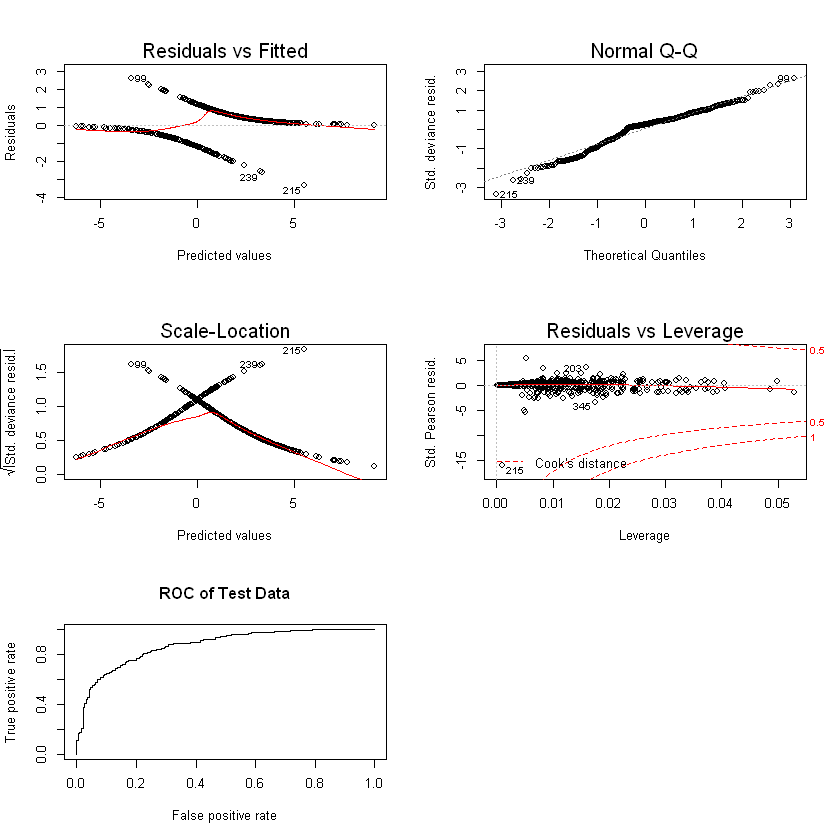

In [32]:
# Method 1
par(mfrow=c(3,2));
obj1 <- glm(y ~ ., data = data, family = "binomial")
summary(obj1)
plot(obj1)

hat.px1 <- predict(obj1, newdata = data.test[,-1], type = "response")
hat.y1 <- ifelse(hat.px1 > 0.5, 1, 0)

result <- table(hat.y1, data.test$y)
as.data.frame.matrix(result)
cat('Predict ACC[', ((result[1,1] + result[2,2]) / sum(result))*100, '%]\n\n')

# ROC curve.
# https://freshrimpsushi.tistory.com/868
library(ROCR)
pr <- prediction(hat.px1, data.test$y)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
performance(pr, "auc")@y.values
plot(prf, main='ROC of Test Data')

,0,1
0,88,249
1,103,60


Predict ACC[ 29.6 %]

[[1]]
[1] 0.2837307

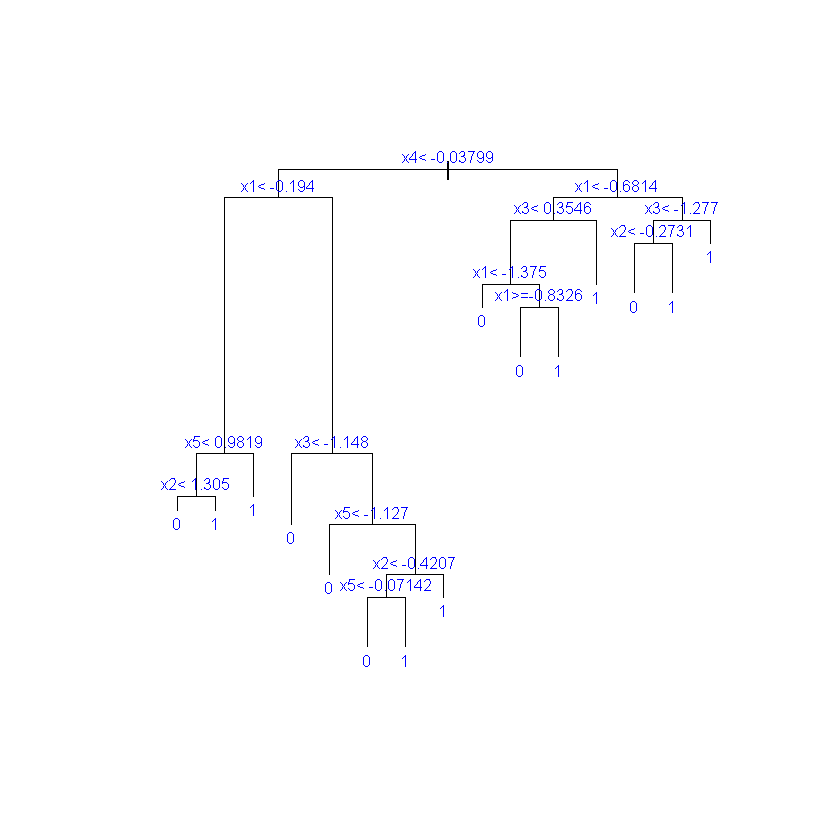

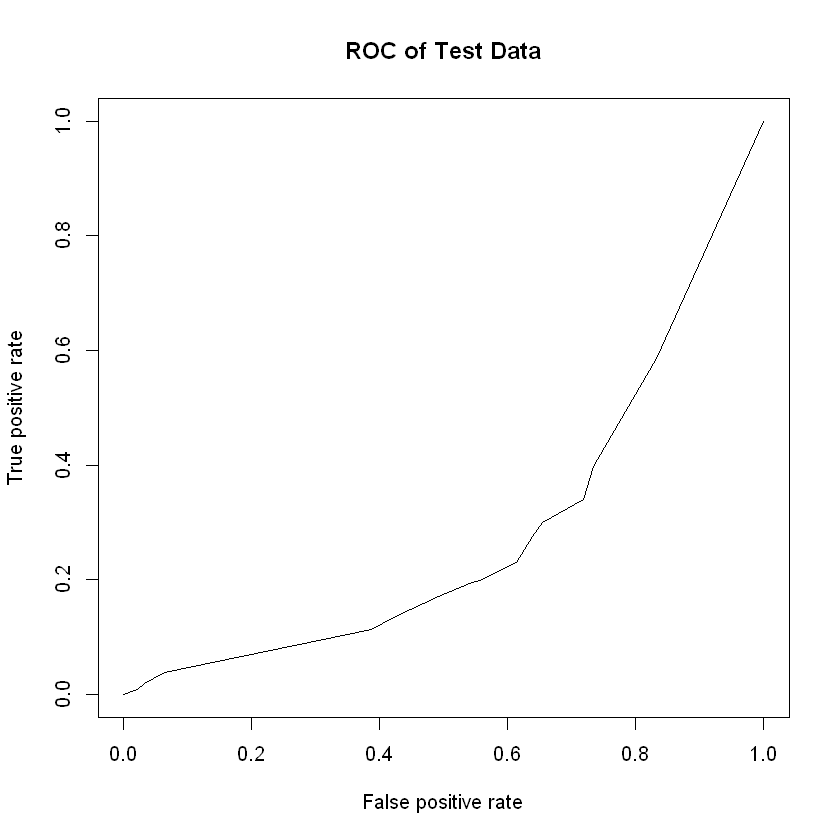

In [34]:
# Method 2

obj2 <- rpart(as.factor(y) ~ ., data = data)
#summary(obj2)
plot(obj2, margin = 0.1)
text(obj2, digits = 2, use.n = F, cex = 0.8, col = "blue")

hat.px2 <- predict(obj2, newdata = data.test[,-1])[,1]
hat.y2 <- ifelse(hat.px2 > 0.5, 1, 0)

result <- table(hat.y2, data.test$y)
as.data.frame.matrix(result)
cat('Predict ACC[', ((result[1,1] + result[2,2]) / sum(result))*100, '%]')


# ROC curve.
# https://freshrimpsushi.tistory.com/868
library(ROCR)
pr <- prediction(hat.px2, data.test$y)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
performance(pr, "auc")@y.values
plot(prf, main='ROC of Test Data')

,0,1
0,103,60
1,88,249


Predict ACC[ 70.4 %]

An object of class "prediction"
Slot "predictions":
[[1]]
      501       502       503       504       505       506       507       508 
0.2307692 0.1173469 0.8529412 0.8888889 0.1173469 0.1369863 0.2000000 0.1173469 
      509       510       511       512       513       514       515       516 
0.1369863 0.8529412 0.8235294 0.2000000 0.8529412 0.1369863 0.1173469 0.1369863 
      517       518       519       520       521       522       523       524 
0.2307692 0.1369863 0.1173469 0.1173469 0.8529412 0.1369863 0.2000000 0.7058824 
      525       526       527       528       529       530       531       532 
0.1173469 0.8529412 0.1173469 0.1173469 0.7058824 0.1369863 0.2000000 0.1173469 
      533       534       535       536       537       538       539       540 
0.1173469 0.1173469 0.1369863 1.0000000 0.1173469 0.2307692 0.7777778 0.1173469 
      541       542       543       544       545       546       547       548 
0.1173469 0.1173469 0.1369863 0.2666667 0.7058824 0

[[1]]
[1] 0.2837307

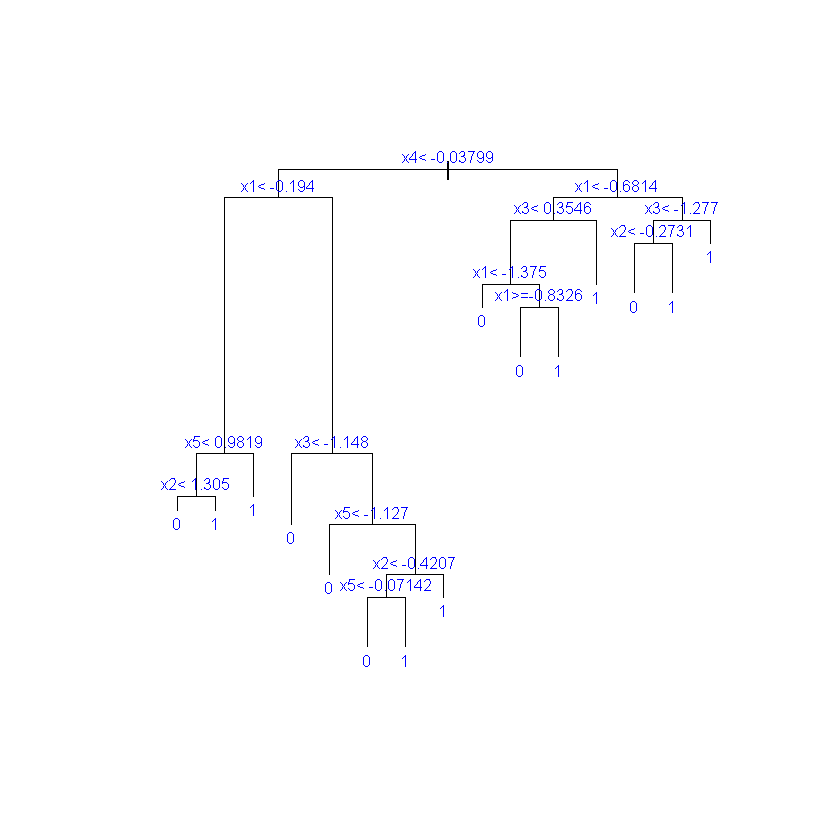

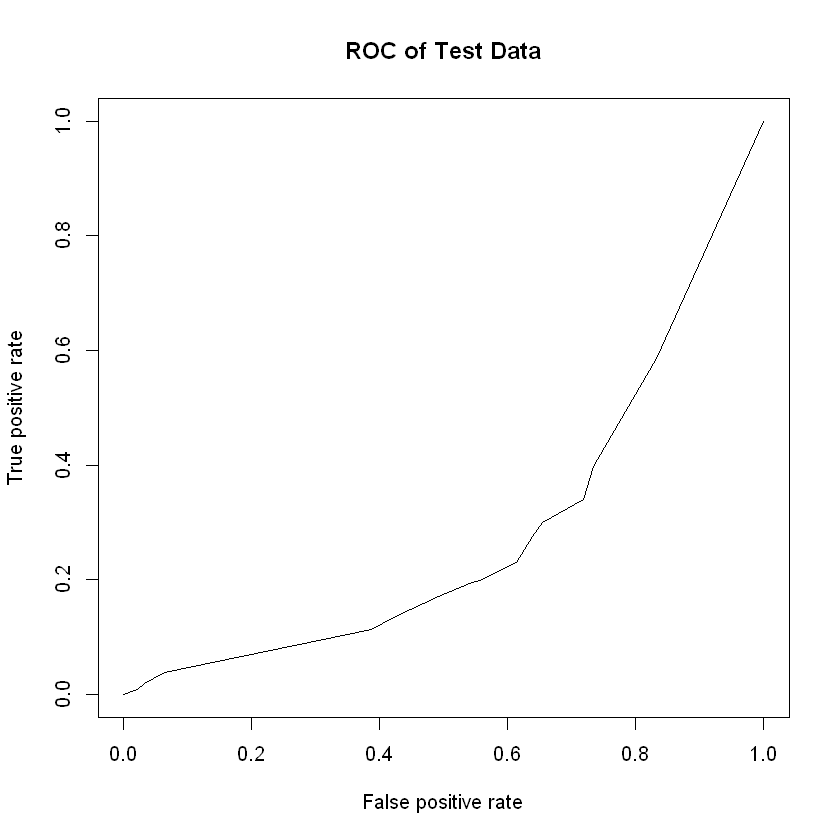

In [47]:
# Method 2

obj2 <- rpart(as.factor(y) ~ ., data = data)
#summary(obj2)
plot(obj2, margin = 0.1)
text(obj2, digits = 2, use.n = F, cex = 0.8, col = "blue")

hat.px2 <- predict(obj2, newdata = data.test[,-1])[,1]
hat.y2 <- ifelse(hat.px2 < 0.5, 1, 0)

result.y2 <- table(hat.y2, data.test$y)
as.data.frame.matrix(result.y2)
cat('Predict ACC[', ((result.y2[1,1] + result.y2[2,2]) / sum(result.y2))*100, '%]')


# ROC curve.
# https://freshrimpsushi.tistory.com/868
library(ROCR)
pr <- prediction(hat.px2, data.test$y)
pr
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
performance(pr, "auc")@y.values
plot(prf, main='ROC of Test Data')

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted        500   factor numeric  
err.rate        1500   -none- numeric  
confusion          6   -none- numeric  
votes           1000   matrix numeric  
oob.times        500   -none- numeric  
classes            2   -none- character
importance         5   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                500   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

,0,1
0,117,48
1,74,261


Predict ACC[ 75.6 %]

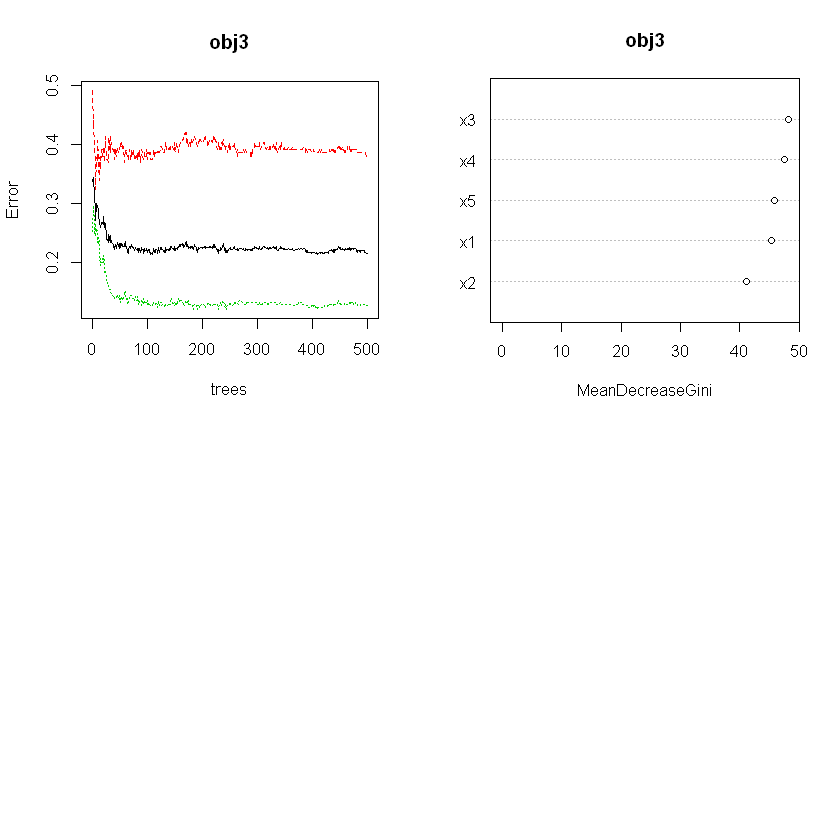

In [36]:
# Method 3
par(mfrow=c(2,2));
obj3 <- randomForest(as.factor(y) ~ ., data = data, ntree = 500)
summary(obj3)
plot(obj3)

hat.y3 <- predict(obj3, newdata = data.test[,-1])

result <- table(hat.y3, data.test$y)
as.data.frame.matrix(result)
cat('Predict ACC[', ((result[1,1] + result[2,2]) / sum(result))*100, '%]')

varImpPlot(obj3, cex = 0.8)